In [1]:
"""
Implementation of the Sliding Lid 
"""
from LB import LB 
from boundaries import * 
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

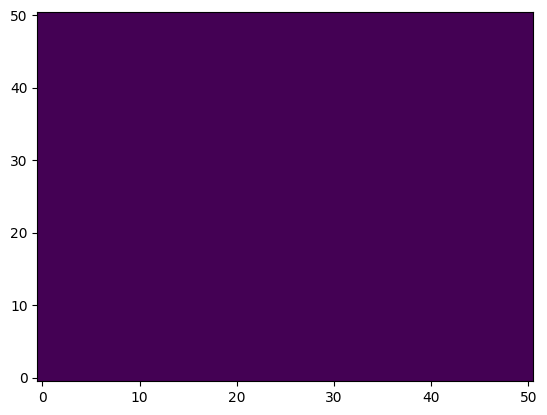

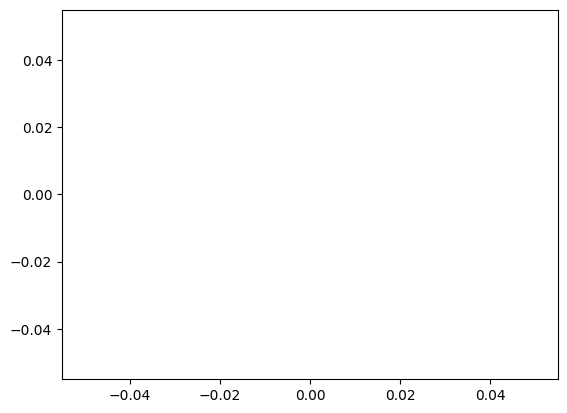

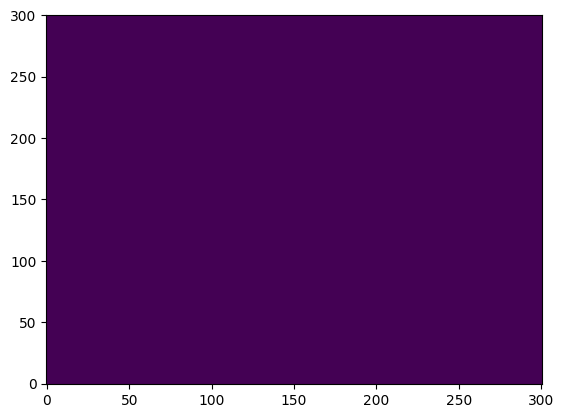

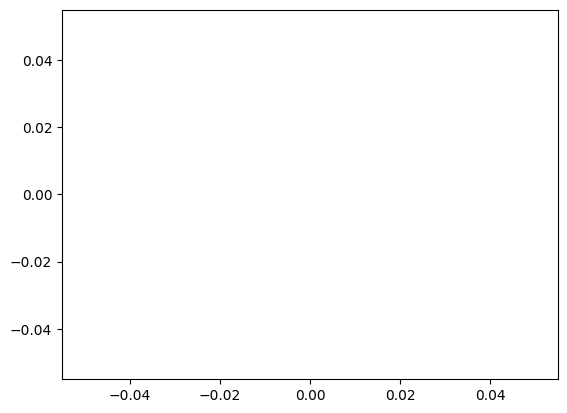

In [2]:
lb = LB()
lb.omega = 1
lb.Nx = 300
lb.Ny = 300
lb.__init__()

# wall velocity
wallVelocity = 0.1
wvarr = [0.0, wallVelocity]
y = np.arange(lb.Ny)
re = 1000
viscosity = wallVelocity*lb.Nx / re
cs = 1/np.sqrt(3)


In [3]:
# lb.F[5,5,5] = 10
# lb.F[30,6,1] = 10
# lb.F[25,2,7] = 10
# lb.F[25,45,3] = 10
# lb.fitParams()

def simulate(timesteps=1000, showDensityPlot=True, showVelocityPlot=True, SAVE_EVERY=1):  

  # boundaries to apply to the simulation 
  boundaries = []
  boundaries.append(BottomWallBoundary(lb))
  boundaries.append(MovingTopWallBoundary(lb, wallVelocity))
  boundaries.append(RightWallBoundary(lb))
  boundaries.append(LeftWallBoundary(lb))

  for i in range(timesteps):

    # boundaries caching values before streaming 
    for boundary in boundaries: 
      boundary.before()

    # apply drift/stream
    lb.streaming()

    # Recalc local variables 
    lb.calculateDensity()
    lb.calculateVelocity()

    # apply collision
    lb.collision()

    for boundary in boundaries: 
      boundary.after()
    
    # lb.calculateDensity()
    # lb.calculateVelocity()
  
    if showDensityPlot:
      if i % SAVE_EVERY == 0:
          lb.updateDensityFigure(lb.rho, timestep = i)
          display.display(lb.densityFig)
          display.clear_output(wait=True)
          
    if showVelocityPlot:
      if i % SAVE_EVERY == 0:
        lb.updateVelocityFigure(lb.ux, lb.uy, timestep = i)
        display.display(lb.velocityFig)
        display.clear_output(wait=True)

    if i % SAVE_EVERY == 0:
      lb.velocityFig.savefig(f"./plots/sliding_lid/img_{i}", bbox_inches='tight', pad_inches=0)



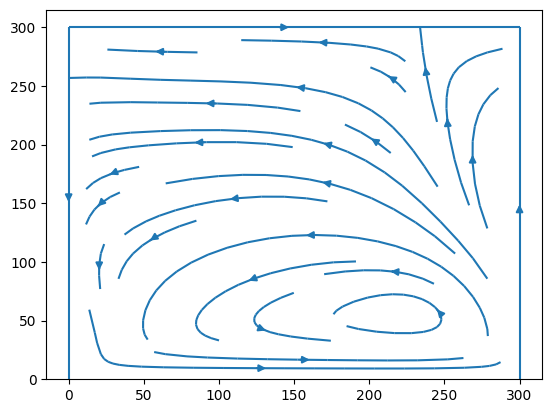

In [4]:
simulate(timesteps=5000, showDensityPlot = False, showVelocityPlot = True, SAVE_EVERY=1000)